In [1]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [4]:
# open events data
notebook_dir = pathlib.Path().absolute()
events_path = os.path.join(notebook_dir.parent, "wyscout-data", "events", "events_England.json")

with open(events_path) as f:
    events = json.load(f)

df_events = pd.DataFrame(events)
df_events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [18]:
# open teams data
teams_path = os.path.join(notebook_dir.parent, "wyscout-data", "teams.json")

with open(teams_path) as f:
    teams = json.load(f)

df_teams = pd.DataFrame(teams)
df_teams.rename(columns={"wyId": "teamId"}, inplace=True)
df_teams.head()


,city,name,teamId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


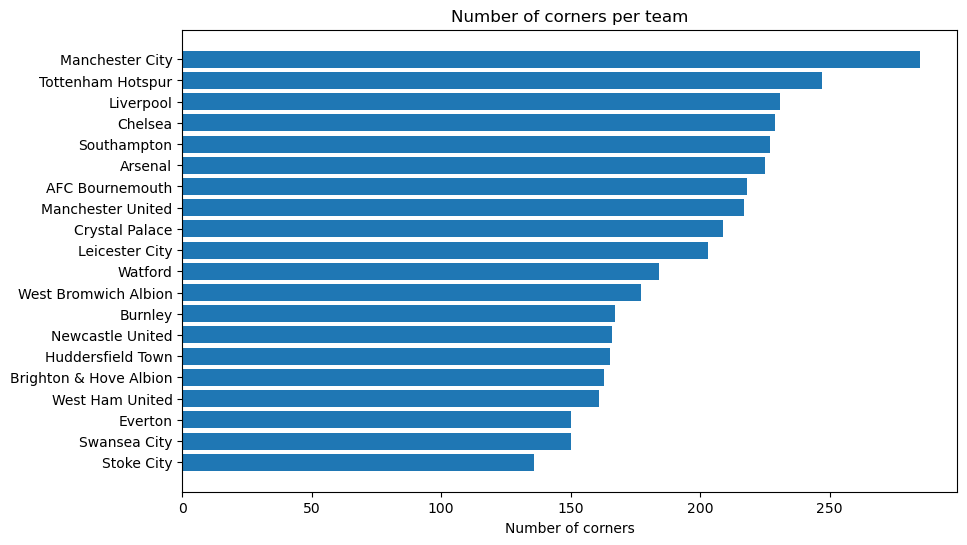

In [53]:
# take out corners
df_corners = df_events[df_events["subEventName"] == "Corner"]

# count corners per team
corners_by_team = df_corners.groupby("teamId").size().reset_index(name="counts")

# merge with teams data
df_corners_by_team = corners_by_team.merge(df_teams[["name", "teamId"]], how="left", on="teamId")
df_corners_by_team.sort_values(by="counts", inplace=True)
df_corners_by_team.head()

# plot
plt.figure(figsize=(10, 6))
plt.barh(df_corners_by_team["name"], df_corners_by_team["counts"])
plt.xlabel("Number of corners")
plt.title("Number of corners per team")
plt.show()

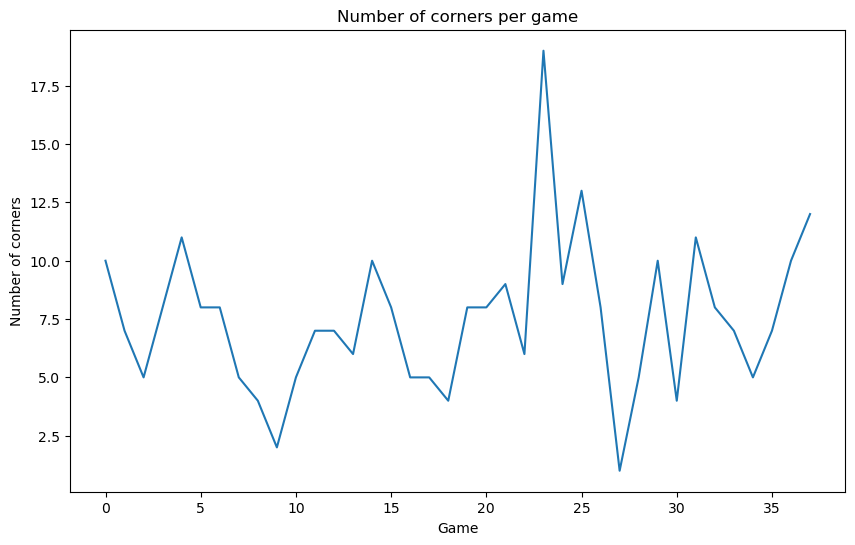

In [52]:
# count corners by team by game
corners_by_game = df_corners.groupby(["teamId", "matchId"]).size().reset_index(name="counts")
corners_by_game.head()

# merge with teams data
df_corners_by_game = corners_by_game.merge(df_teams[["name", "teamId"]], how="left", on="teamId")
df_corners_by_game.head()

# get games from team with most corners
team_most_corners = df_corners_by_team.iloc[-1]["name"]
df_corners_by_game_team = df_corners_by_game[df_corners_by_game["name"] == team_most_corners].reset_index()

# plot counts on y axis and matchId on x axis
plt.figure(figsize=(10, 6))
plt.plot(df_corners_by_game_team["counts"])
plt.ylabel("Number of corners")
plt.xlabel("Game")
plt.title("Number of corners per game")
plt.show()


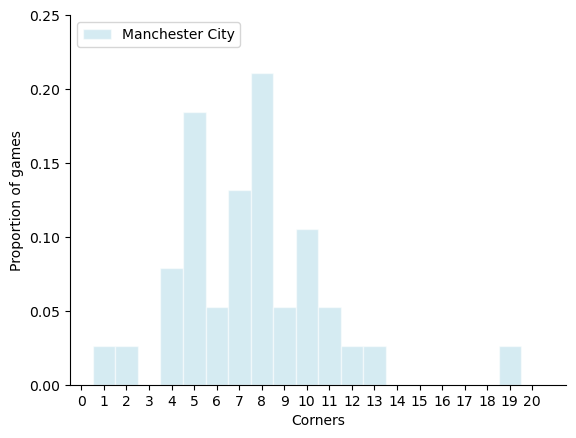

Manchester City typically had 7.50 plus/minus 3.28 corners per game


In [59]:
# plot distribution of corners by game for team with most corners (x-axis step=1)
def FormatFigure(ax):
    ax.legend(loc='upper left')
    ax.set_ylim(0,0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('')
    ax.set_xlabel('Corners')
    ax.set_ylabel('Proportion of games')
    ax.set_xticks(np.arange(0,21,step=1))

fig, ax = plt.subplots(1, 1)
ax.hist(df_corners_by_game_team["counts"], np.arange(0.01,20.5,1), color='lightblue', edgecolor = 'white',linestyle='-',alpha=0.5, label=team_most_corners, density=True,align='right')
FormatFigure(ax)
plt.show()

mean = df_corners_by_game_team["counts"].mean()
std = df_corners_by_game_team["counts"].std()

print(f"{team_most_corners} typically had {mean:.2f} plus/minus {std:.2f} corners per game")